# Selecting Assets I

In [1]:
# Working with data:
import numpy  as np                                   # For scientific computing.
import pandas as pd                                   # Working with tables.

# Downloading files:
import requests, zipfile, io                                # To access websites.

import os

# Specific data providers:
from tiingo import TiingoClient                       # Stock prices.
import quandl                                         # Economic data, futures prices, ...

# API keys:
tiingo = TiingoClient({'api_key':'f10f5d79cf2567b045cc7e9b595a6fec0f5321d2'})
quandl.ApiConfig.api_key = 'EqpCyveK1jFmUkmzpPjz'

# Plotting:
import matplotlib.pyplot as plt                        # Basic plot library.
plt.style.use('ggplot')                                # Make plots look nice

Read the "close" table we downloaded from tiingo:

In [5]:
PRICE = pd.read_csv('data/tiingo/close.csv', index_col = 'date', parse_dates = ['date'])
PRICE

,AIR,ABT,WDDD,ACU,AE,BKTI,AMD,AEM,APD,AKZOF,...,KVSB,TIOAU,MSDAU,GGPIU,NECB,HITIF,AYRWF,OUTR,ABCO,NHLDW
date,,,,,,,,,,,,,,,,,,,,,
2009-04-15,14.43,42.66,0.1700,7.4300,14.65,0.6400,3.44,49.32,59.79,41.700,...,NaN,NaN,NaN,NaN,7.15,NaN,NaN,NaN,18.29,NaN
2009-04-16,15.04,42.69,0.1700,7.6000,14.84,0.6300,3.57,45.73,60.48,44.400,...,NaN,NaN,NaN,NaN,7.15,NaN,NaN,NaN,18.29,NaN
2009-04-17,15.17,43.89,0.1700,7.2000,15.00,0.5500,3.56,43.65,60.65,44.400,...,NaN,NaN,NaN,NaN,7.30,NaN,NaN,NaN,18.52,NaN
2009-04-20,14.01,44.09,0.1700,7.3800,14.50,0.5598,3.31,46.97,57.79,44.400,...,NaN,NaN,NaN,NaN,7.30,NaN,NaN,NaN,17.39,NaN
2009-04-21,14.66,44.37,0.1700,7.3900,14.50,0.5600,3.36,45.53,58.05,44.400,...,NaN,NaN,NaN,NaN,7.10,NaN,NaN,NaN,17.06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-12,40.92,121.04,0.3925,38.6900,26.00,4.6400,78.58,60.12,282.88,116.300,...,10.27,10.0000,10.230,10.000,16.45,0.550100,27.8700,NaN,NaN,NaN
2021-04-13,40.23,123.01,0.3850,38.7501,26.34,4.5100,80.19,61.25,285.11,117.100,...,10.20,10.0475,10.345,10.005,16.45,0.526000,27.9546,NaN,NaN,NaN
2021-04-14,41.08,121.50,0.3900,38.3057,26.59,4.6800,78.55,60.80,282.88,117.100,...,10.24,10.0200,10.460,10.010,16.45,0.503515,28.0400,NaN,NaN,NaN


In [6]:
PRICE.index

DatetimeIndex(['2009-04-15', '2009-04-16', '2009-04-17', '2009-04-20',
               '2009-04-21', '2009-04-22', '2009-04-23', '2009-04-24',
               '2009-04-27', '2009-04-28',
               ...
               '2021-04-05', '2021-04-06', '2021-04-07', '2021-04-08',
               '2021-04-09', '2021-04-12', '2021-04-13', '2021-04-14',
               '2021-04-15', '2021-04-16'],
              dtype='datetime64[ns]', name='date', length=3023, freq=None)

Read the "adjClose" table and calculate the returns:

In [7]:
RET = pd.read_csv('data/tiingo/adjClose.csv', index_col = 'date', parse_dates = ['date']).pct_change()
RET

,AIR,ABT,WDDD,ACU,AE,BKTI,AMD,AEM,APD,AKZOF,...,KVSB,TIOAU,MSDAU,GGPIU,NECB,HITIF,AYRWF,OUTR,ABCO,NHLDW
date,,,,,,,,,,,,,,,,,,,,,
2009-04-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-04-16,0.042273,0.000703,0.000000,0.022880,0.012969,-0.015625,0.037791,-0.072790,0.011540,0.064748,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN
2009-04-17,0.008644,0.028110,0.000000,-0.052632,0.010782,-0.126984,-0.002801,-0.045484,0.002811,0.000000,...,NaN,NaN,NaN,NaN,0.020979,NaN,NaN,NaN,0.012575,NaN
2009-04-20,-0.076467,0.004557,0.000000,0.025000,-0.033333,0.017818,-0.070225,0.076060,-0.047156,0.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,-0.061015,NaN
2009-04-21,0.046395,0.006351,0.000000,0.001355,0.000000,0.000357,0.015106,-0.030658,0.004499,0.000000,...,NaN,NaN,NaN,NaN,-0.027397,NaN,NaN,NaN,-0.018976,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-12,0.000734,0.001158,0.032895,0.047941,-0.061711,-0.051125,-0.050507,-0.010696,-0.005205,0.000000,...,0.002939,0.000000,-0.006796,0.000000,-0.001214,-0.068890,-0.002034,0.0,0.000000,0.0
2021-04-13,-0.016862,0.016276,-0.019108,0.001553,0.013077,-0.028017,0.020489,0.018796,0.007883,0.006879,...,-0.006816,0.004750,0.011241,0.000500,0.000000,-0.043810,0.003036,0.0,0.000000,0.0
2021-04-14,0.021129,-0.008617,0.012987,-0.011468,0.009491,0.037694,-0.020451,-0.007347,-0.007822,0.000000,...,0.003922,-0.002737,0.011116,0.000500,0.000000,-0.042747,0.003055,0.0,0.000000,0.0


Get VTI as benchmark:

In [9]:
vti = tiingo.get_dataframe(['VTI'], '1999-1-1', metric_name='adjClose')
vti.index = pd.to_datetime(vti.index).tz_convert(None)
vti[:3]
#THIS IS THE VANGUARD TOTAL MARKET INDEX FUND

,VTI
2001-05-31,39.732523
2001-06-01,40.009405
2001-06-04,40.182456


Our backtest function:

In [13]:
def get_rebalance_dates(frequency, start_date):
    price = PRICE[PRICE.index>start_date]
    group = getattr(price.index, frequency) 
    return price[:1].index.union(price.groupby([price.index.year, group]).tail(1).index)



def run_backtest(frequency, backtest_start='1900-1-1'):   
    
    rebalance_dates = get_rebalance_dates(frequency, backtest_start) 

    portfolio_value = pd.Series(1,                        index=[rebalance_dates[0]])    
    weights         = pd.DataFrame(columns=PRICE.columns, index=[rebalance_dates[0]])
    trades          = pd.DataFrame(columns=PRICE.columns, index=[rebalance_dates[0]])

    previous_positions = weights.iloc[0]
        
    for i in range(1, len(rebalance_dates)-1):
        start_date = rebalance_dates[i]
        end_date   = rebalance_dates[i+1]

        cum_ret = RET[start_date:end_date][1:].add(1).cumprod()
        
        assets        = select_assets(start_date)
        
        start_weights = select_weights(start_date, assets)      # Call "select_weights()" function to get the weights
            
        new_positions = portfolio_value.iloc[-1] * start_weights   

        start_to_end_positions = new_positions * cum_ret
        start_to_end_value     = start_to_end_positions.sum('columns')

        portfolio_value = portfolio_value.append(start_to_end_value) 
                
        weights = weights.append(start_to_end_positions.div(start_to_end_value,'rows'))                 
                
        trades.loc[start_date] = new_positions - previous_positions 
        previous_positions     = start_to_end_positions.iloc[-1]      # Previous positions for the next rebalance round

    return portfolio_value.pct_change(), weights, trades

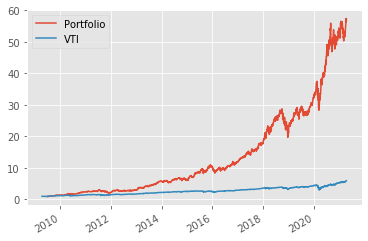

In [14]:
def select_assets(date):
        assets = ['AAPL','MSFT','AMZN','NFLX']
        return assets

def select_weights(date, assets):      
    return pd.Series(1/len(assets), index=assets)   


portfolio, weights, trades = run_backtest('quarter')

t = portfolio.to_frame('Portfolio').join(vti.pct_change())
t.add(1).cumprod().plot()

### Select assets with price data

Let's select firms by trading volume.      
Read volume table:

In [18]:
VOLUME = pd.read_csv('data/tiingo/volume.csv', index_col='date', parse_dates=['date'])
VOLUME[-3:]

,AIR,ABT,WDDD,ACU,AE,BKTI,AMD,AEM,APD,AKZOF,...,KVSB,TIOAU,MSDAU,GGPIU,NECB,HITIF,AYRWF,OUTR,ABCO,NHLDW
date,,,,,,,,,,,,,,,,,,,,,
2021-04-14,158866,4726734,23094.0,2274,11105,35817,34263832,2058916,631742,0.0,...,136226.0,373794.0,30383.0,3554064.0,0.0,4040925.0,56030.0,NaN,NaN,NaN
2021-04-15,151706,4510894,186359.0,32977,16172,15322,68942819,2106932,778193,690.0,...,16090.0,12986.0,80354.0,904483.0,475.0,5853973.0,97611.0,NaN,NaN,NaN
2021-04-16,137437,6243068,143826.0,26614,7406,10587,47280570,1558861,1013546,200.0,...,19720.0,3553.0,186007.0,270444.0,390.0,3057846.0,106705.0,NaN,NaN,NaN


In [19]:
DOLLAR_VOLUME = VOLUME * PRICE
DOLLAR_VOLUME

,AIR,ABT,WDDD,ACU,AE,BKTI,AMD,AEM,APD,AKZOF,...,KVSB,TIOAU,MSDAU,GGPIU,NECB,HITIF,AYRWF,OUTR,ABCO,NHLDW
date,,,,,,,,,,,,,,,,,,,,,
2009-04-15,4819620.00,2.377736e+09,0.0000,7.430000e+02,4395.00,2371.2000,5.366847e+07,1.242223e+08,6.884818e+07,0.00,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,892552.0,NaN
2009-04-16,5468544.00,1.293806e+09,0.0000,7.600000e+03,10388.00,5670.0000,3.613126e+07,2.394240e+08,7.198330e+07,12520.80,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,879749.0,NaN
2009-04-17,4611680.00,1.409053e+09,0.0000,4.608000e+04,27000.00,4729.4500,4.351851e+07,1.938802e+08,8.534668e+07,0.00,...,NaN,NaN,NaN,NaN,1460.0,NaN,NaN,NaN,1344552.0,NaN
2009-04-20,4400541.00,1.136120e+09,0.0000,2.287800e+04,43500.00,13630.5702,3.476228e+07,2.468133e+08,9.304768e+07,0.00,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1006881.0,NaN
2009-04-21,5079690.00,8.675134e+08,0.0000,3.547200e+04,53650.00,4648.0000,4.786152e+07,1.485553e+08,1.572516e+08,0.00,...,NaN,NaN,NaN,NaN,74550.0,NaN,NaN,NaN,1549048.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-12,5905819.92,3.529496e+08,11473.9525,6.179567e+05,573300.00,63855.6800,4.879724e+09,4.903159e+07,1.929267e+08,0.00,...,156463.45,1.394570e+06,265345.74,3.498410e+06,43757.0,2.515332e+06,3.687870e+06,NaN,NaN,NaN
2021-04-13,10349690.49,6.082314e+08,7568.7150,2.684607e+05,157486.86,29847.1800,3.028556e+09,8.736210e+07,2.547968e+08,13583.60,...,1263229.20,3.231176e+05,123084.81,1.431410e+07,0.0,1.799550e+06,2.493327e+06,NaN,NaN,NaN
2021-04-14,6526215.28,5.742982e+08,9006.6600,8.710716e+04,295281.95,167623.5600,2.691424e+09,1.251821e+08,1.787072e+08,0.00,...,1394954.24,3.745416e+06,317806.18,3.557618e+07,0.0,2.034666e+06,1.571081e+06,NaN,NaN,NaN


For example, select 10 firms with the highest most recent dollar volume:

In [23]:
DOLLAR_VOLUME.iloc[-1].dropna().sort_values(ascending = False)[:10]

TSLA    2.069869e+10
AAPL    1.139319e+10
AMZN    1.083078e+10
COIN    7.747853e+09
MSFT    6.486841e+09
NVDA    5.333990e+09
FB      3.998455e+09
AMD     3.884099e+09
BA      3.624905e+09
BABA    3.441622e+09
Name: 2021-04-16 00:00:00, dtype: float64

In [24]:
DOLLAR_VOLUME.iloc[-1].nlargest(10)

TSLA    2.069869e+10
AAPL    1.139319e+10
AMZN    1.083078e+10
COIN    7.747853e+09
MSFT    6.486841e+09
NVDA    5.333990e+09
FB      3.998455e+09
AMD     3.884099e+09
BA      3.624905e+09
BABA    3.441622e+09
Name: 2021-04-16 00:00:00, dtype: float64

Select 10 firms with the highest average dollar volume during the most recent 30 trading days:

In [33]:
DOLLAR_VOLUME[-30:].mean().nlargest(10)

TSLA    2.563204e+10
COIN    1.573281e+10
AAPL    1.286492e+10
AMZN    1.040407e+10
MSFT    7.071912e+09
FB      5.833706e+09
NVDA    4.750125e+09
BA      4.704410e+09
GME     4.385671e+09
BABA    4.138117e+09
dtype: float64

In [35]:
DOLLAR_VOLUME[-30:].mean().nlargest(10).index

Index(['TSLA', 'COIN', 'AAPL', 'AMZN', 'MSFT', 'FB', 'NVDA', 'BA', 'GME',
       'BABA'],
      dtype='object')

Backtest this strategy:

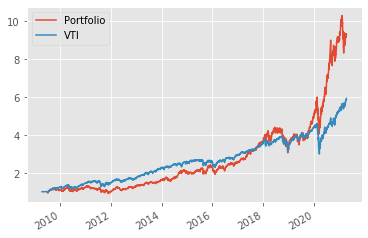

In [38]:
def select_assets(date):
        assets = DOLLAR_VOLUME[:date][-30:].mean().nlargest(10).index
        return assets

def select_weights(date, assets):      
    w = pd.Series(1/len(assets), index=assets)   
    return w


portfolio, weights, trades = run_backtest('quarter')

t = portfolio.to_frame('Portfolio').join(vti.pct_change())
t.add(1).cumprod().plot()

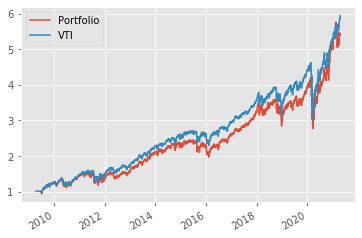

In [39]:
def select_assets(date):
        assets = DOLLAR_VOLUME[:date][-30:].mean().nlargest(100).index
        return assets

def select_weights(date, assets):      
    w = pd.Series(1/len(assets), index=assets)   
    return w


portfolio, weights, trades = run_backtest('quarter')

t = portfolio.to_frame('Portfolio').join(vti.pct_change())
t.add(1).cumprod().plot()

### Select assets with fundamental data

Read file with SEC data:

In [ ]:
pd.read_csv('data/sec/merged/2010q1.csv', parse_dates=['filed','ddate'])

Use this function to read all the files and get all the values for these tags:

In [197]:
def get_items_from_SEC_files(tags, filename=None):                # Function input: list of tags, optional filename.

    directory = 'data/sec/merged/'                                # Read data from here.
    filenames = [filename] if filename else os.listdir(directory) # Supplied filename or all files in "merged" directory.
    filenames = [f for f in filenames if not f.startswith(".")]   # Exclude hidden files from file list.

    results   = {t:pd.DataFrame() for t in tags}                  # Dictionary of tables (1 table for each tag)

    for filename in sorted(filenames):                            # Loop over all files.
        print(filename)
        data = pd.read_csv(directory+filename, parse_dates=['filed','ddate'])  # Read the file.
        
        for t in tags:                                            # Loop over all tags.
            item  = data[data.tag==t]                             # Select all data for this tag.
            short = item.sort_values(['cik','filed','ddate','qtrs'], ascending=[True,True,True,False]) # Samllest qrts.
            long  = item.sort_values(['cik','filed','ddate','qtrs'], ascending=[True,True,True,True])  # Largest  qtrs.
            short = short.groupby(['cik','filed']).last()[['value','qtrs']]     # One value for each firm and filing.
            long  = long .groupby(['cik','filed']).last()[['value','qtrs']]     
            short_long = short.join(long, lsuffix='_shortest', rsuffix='_longest') # Put shortest and longest next to each other.
            results[t] = results[t].append( short_long )  
                        
    for t in tags:                                                # Now sort all tables by filing date.
        if not results[t].empty: results[t] = results[t].sort_index(level='filed')            

    return results

Run the function like this:

In [ ]:
x = get_items_from_SEC_files(['SalesRevenueNet'], '2010q1.csv')
x

In [ ]:
x['SalesRevenueNet']

All tags for Revenue (sales):

In [ ]:
tags = ['RevenueFromContractWithCustomerExcludingAssessedTax','SalesRevenueNet','Revenues','SalesRevenueGoodsNet',
        'SalesAndOtherOperatingRevenueIncludingSalesBasedTaxes','TotalRevenuesAndOtherIncome','RevenuesNetOfInterestExpense']

Run the function for these tags:

In [ ]:
items = get_items_from_SEC_files(tags)

Check results for "Revenues":

In [ ]:
items['Revenues']

For example, Apple sales:

In [ ]:
items['Revenues'].loc[320193]

In [ ]:
items['SalesRevenueNet'].loc[320193]

In [ ]:
items['RevenueFromContractWithCustomerExcludingAssessedTax'].loc[320193]

Fix data error for "RevenueFromContractWithCustomerExcludingAssessedTax":

In [ ]:
# RUN THIS CELL ONLY ONCE!
# Fixing data errors

# MKSI cik: 1049502
tag = 'RevenueFromContractWithCustomerExcludingAssessedTax'
t = items[tag].reset_index()
t.loc[(t.cik==1049502) & (t.filed=='2018-05-08'), 'value_longest']  /= 1000
t.loc[(t.cik==1049502) & (t.filed=='2018-05-08'), 'value_shortest'] /= 1000
items[tag] = t.set_index(['cik','filed'])

Combine all all the tags to one "sales" item:

In [ ]:
def combine_items(tags, items):
    result = items[tags[0]]
    for tag in tags[1:]:  result = result.combine_first( items[tag] )
    return result


items['sales'] = combine_items(tags_sales, items)

Apple sales:

In [ ]:
items['sales'].loc[320193]

Calculate the quarterly and annual values:

In [ ]:
def calculate_quarterly_annual_values(item):                        # item: table with shortest and longest values and quarters.
    result           = pd.DataFrame()                               # Results go here.
    all_firms        = item.index.get_level_values('cik').unique()  # All CIKs.
    all_filing_dates = pd.read_csv('data/sec/dates/filing_dates.csv', index_col='cik', parse_dates=['filed'])
    
    for cik in all_firms:                                           # Loop over all firms.  
        filing_dates = pd.Series(all_filing_dates.filed[cik])       # All filing dates for this firm.

        # Quarterly values:
        valuesQ = item.loc[cik].value_shortest.reindex(filing_dates) # Values with shortest reported quarters.
        qtrsQ   = item.loc[cik].qtrs_shortest.astype(int)           # Number of quarters for each value.
        for date,q in qtrsQ[qtrsQ>1].iteritems():                   # Loop over all dates with > 1 quarters. 
            previous_values = valuesQ[:date][-q:-1]                 # Example: for q=3 we need to subtract 2 previous quarters.            
            if len(previous_values) == q-1:                         # If all previous values available.
                valuesQ[date] -= previous_values.sum(skipna=False)  # Subtract previous values to get quarterly value.
            else:
                valuesQ[date]  = np.nan                  

        # Annual values:
        valuesA = item.loc[cik].value_longest.reindex(filing_dates) # Values with longest reported quarters.
        qtrsA   = item.loc[cik].qtrs_longest.astype(int)            # Number of quarters for each value.
        for date,q in qtrsA[qtrsA<4].iteritems():                   # Loop over all dates with < 4 quarters. 
            previous_values = valuesQ[:date][-4:-q]                 # Example: for q=2 we need to add quarters -3 and -4.
            if len(previous_values) == 4-q:                         # If all previous data available.     
                valuesA[date] += previous_values.sum(skipna=False)  # Add previous values to get annual values.
            else:
                valuesA[date]  = np.nan        
        
        result = result.append( pd.DataFrame({'cik':cik, 'filed':filing_dates, 'valueQ':valuesQ.values, 'valueA':valuesA.values}) )

    return result.set_index(['cik','filed'])                        # Return a table with columns 'valueQ' and 'valueA'.



sales = calculate_quarterly_annual_values(items['sales'])

Apple:

In [ ]:
sales.loc[320193]

In [ ]:
# Save files
sales.to_csv('data/sec/items/Sales.csv')

In [ ]:
# Read files
sales = pd.read_csv('data/sec/items/Sales.csv',  parse_dates=['filed'], index_col=['cik','filed'])

We want to generate a table with assets in columns and trading days in rows (to use inside our "select_asset" function).      
Get trading days:

In [ ]:
trading_days = pd.to_datetime( tiingo.get_dataframe('SPY','2009-04-15').index ).tz_convert(None)
trading_days

Now forward-fill the sales data to all trading days:

In [ ]:
def ffill_values(item, dates):                                          
    data = item.unstack('cik')
    data = data.reindex(dates.union(data.index)).sort_index()           # Add specified dates to index.
    filing_dates = pd.read_csv('data/sec/dates/filing_dates.csv', index_col='cik', parse_dates=['filed']).filed
    last_filing_date_all_firms = filing_dates.max()                     # Most recent date where at least 1 firm filed.
     
    for cik in data.columns:                                            # Loop over all firms.
        last_filing_date      = pd.Series(filing_dates[cik]).iloc[-1]   # Last date where this firm filed
        days_since_last_filed = (last_filing_date_all_firms - last_filing_date).days
        last_date_this_firm   = dates[-1] if days_since_last_filed < 120 else last_filing_date
        data.loc[:last_date_this_firm, cik].ffill(inplace=True)         # Forward fill all the values.

    return data.loc[dates]                                              # Return only specified dates.   




salesQ = ffill_values( sales.valueQ,  trading_days )
salesA = ffill_values( sales.valueA,  trading_days )
salesA

Now we need to change the column labels from CIKs to ticker symbols:

In [ ]:
symbols = pd.read_csv('data/ticker_symbols/symbols.csv',index_col=0)
symbols

In [ ]:
SALESQ = salesQ.rename()
SALESA = salesA.rename()
SALESA

Suppose we select the 10 firms with the highest annual sales at the end of each quarter: